### Flight Price Prediction:<br>
**Problem Statement:**<br>
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.<br>

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [103]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [104]:
## Reading the train dataset
data=pd.read_excel('Data_Train.xlsx')
## Saving a copy of the original dataset
data_copy=data

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [105]:
data.shape

(10683, 11)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [107]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include='object').columns)

print(colored('No ofcolumns with object data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include='object').columns))

columns with object data: 
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')
No ofcolumns with object data: 
10


In [108]:
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['int64','float64']).columns)

print(colored('No ofcolumns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include=['int64','float64']).columns))

columns with numeric data: 
Index(['Price'], dtype='object')
No ofcolumns with numeric data: 
1


In [109]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- We have 10 features and 10683 observations.
- All features have object data type.
- 'Price' is the target and stores numeric data.
- 'Route'& 'Total_Stops' are missing one value each.

In [110]:
## Converting 'Date_of_Journey' in datetime format
data['Date_of_Journey'] = pd.to_datetime(data.Date_of_Journey)
data['Date_of_Journey'].head(2)

0   2019-03-24
1   2019-01-05
Name: Date_of_Journey, dtype: datetime64[ns]

In [111]:
## Extracting 'Day' and 'Month' from 'Date_of_Journey'
data['Day'] = data.Date_of_Journey.apply(lambda x: x.day)
data['Month'] = data.Date_of_Journey.apply(lambda x: x.month)

In [112]:
## Dropping 'Date_of_Journey'
data.drop('Date_of_Journey',axis=1,inplace=True)

- Extracting Departure Hour and Departure Minutes from 'Dep_Time' and converting them to 'int' datatype

In [113]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [114]:
## Dropping 'Dep_Time'
data.drop('Dep_Time',axis=1,inplace=True)

In [115]:
data[['Dep_hour','Dep_min']].head()

,Dep_hour,Dep_min
0,22,20
1,5,50
2,9,25
3,18,5
4,16,50


- Extracting Arrival Hour and Arrival Minutes from 'Arrival_Time' and converting them to 'int' datatype

In [116]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

data.drop('Arrival_Time',axis=1,inplace=True)

In [117]:
data[['Arrival_hour','Arrival_min']].head()

,Arrival_hour,Arrival_min
0,1,10
1,13,15
2,4,25
3,23,30
4,21,35


- Extracting flight duration in minutes from 'Duration'.

In [118]:
data["Duration_mins"]=data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)
data.drop('Duration',axis=1,inplace=True)

In [119]:
data['Duration_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_mins, Length: 10683, dtype: int64

- Extracting number of stops from 'Total_Stops'

In [120]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [121]:
data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

- Extracting ports from 'Route'

In [122]:
data['Port1']=data['Route'].str.split('→').str[0]
data['Port2']=data['Route'].str.split('→').str[1]
data['Port3']=data['Route'].str.split('→').str[2]
data['Port4']=data['Route'].str.split('→').str[3]
data['Port5']=data['Route'].str.split('→').str[4]

In [123]:
data.drop('Route',axis=1,inplace=True)

In [124]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Port1,Port2,Port3,Port4,Port5
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,22,20,1,10,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2.0,No info,7662,5,1,5,50,13,15,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,6,9,9,25,4,25,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,5,12,18,5,23,30,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,3,1,16,50,21,35,285,BLR,NAG,DEL,NaN,NaN


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Total_Stops      10682 non-null  float64
 4   Additional_Info  10683 non-null  object 
 5   Price            10683 non-null  int64  
 6   Day              10683 non-null  int64  
 7   Month            10683 non-null  int64  
 8   Dep_hour         10683 non-null  int64  
 9   Dep_min          10683 non-null  int64  
 10  Arrival_hour     10683 non-null  int64  
 11  Arrival_min      10683 non-null  int64  
 12  Duration_mins    10683 non-null  int64  
 13  Port1            10682 non-null  object 
 14  Port2            10682 non-null  object 
 15  Port3            7191 non-null   object 
 16  Port4            1566 non-null   object 
 17  Port5       

- Checking for null values

In [126]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Additional_Info        0
Price                  0
Day                    0
Month                  0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Duration_mins          0
Port1                  1
Port2                  1
Port3               3492
Port4               9117
Port5              10637
dtype: int64

In [127]:
## Filling null value in 'Total_Stops' by its mode
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0],inplace=True)

In [128]:
## Filling missing values in port1 and port2 by Mode
data['Port1'].fillna(data['Port1'].mode()[0],inplace=True)
data['Port2'].fillna(data['Port2'].mode()[0],inplace=True)

In [129]:
##Filling missing values in Port3, Port4 and Port5 by 'None'
data['Port3'].fillna('None',inplace=True)
data['Port4'].fillna('None',inplace=True)
data['Port5'].fillna('None',inplace=True)

In [130]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_mins      0
Port1              0
Port2              0
Port3              0
Port4              0
Port5              0
dtype: int64

**Successfully replaced all the null values**

<font color='red'>
    
# EDA

In [131]:
## Storing catagorical and continuous features seperately for analysis purpose.
cat_feat=data[['Airline', 'Source','Total_Stops', 'Destination', 'Additional_Info','Port1','Port2','Port3','Port4','Port5']]
cont_feat=data[['Day','Month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_mins']]

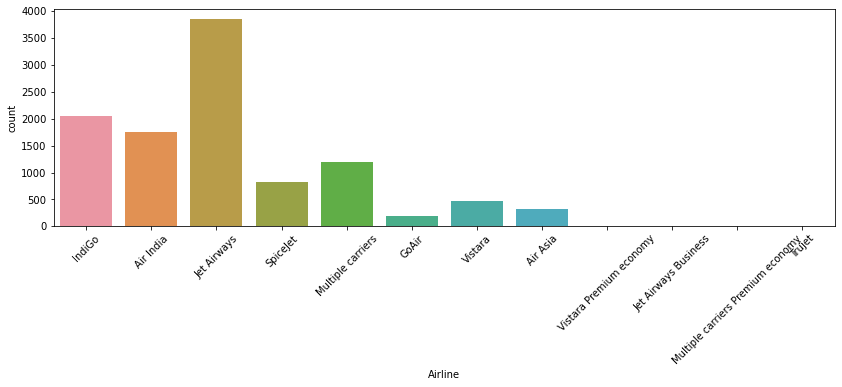

In [132]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
sns.countplot(data['Airline'])

- 'Jet Airways' has most number of flights followed by 'IndiGo' and 'Air India'

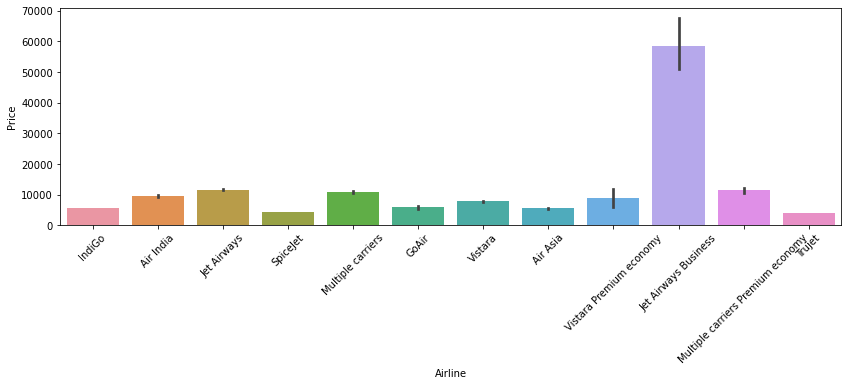

In [133]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
sns.barplot(x=data['Airline'],y=data['Price'])

- 'Jet Airways Business' is the costliest

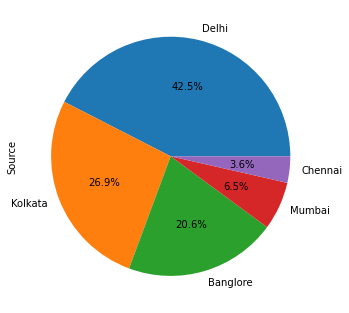

In [134]:
plt.figure(figsize=(5.5,5.5))
data['Source'].value_counts().plot.pie(autopct='%1.1f%%')

- Majority of flights originate from 'Delhi' followed by 'Kolkata' and 'Banglore'

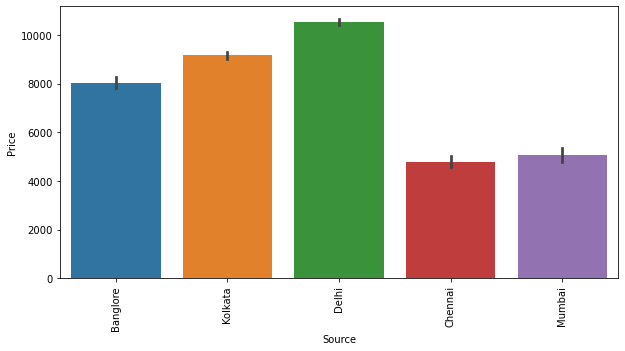

In [135]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=data['Source'],y=data['Price'])

- Flights originating from 'Delhi' tend to be costlier

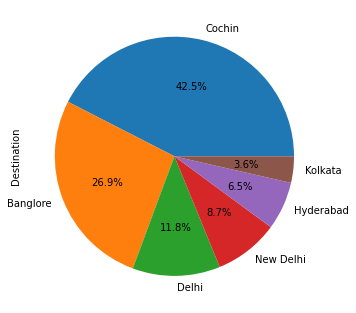

In [136]:
plt.figure(figsize=(5.5,5.5))
data['Destination'].value_counts().plot.pie(autopct='%1.1f%%')

'Cochin' is the most common destination for the flights followed by 'Banglore' and 'Delhi'

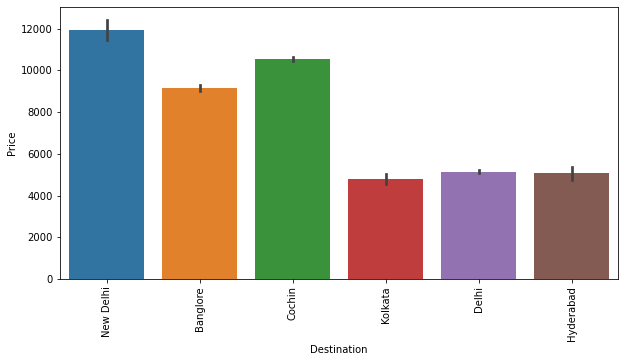

In [137]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=data['Destination'],y=data['Price'])

- Flights with the destination 'New Delhi' tend to be costlier followed by 'Cochin' and 'Bangalore'

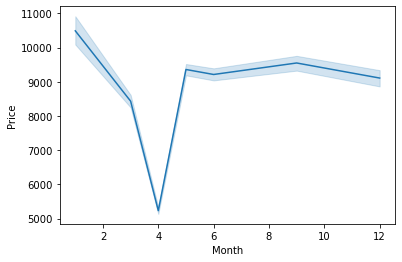

In [138]:
sns.lineplot(x=data['Month'],y=data['Price'])

- Flights are costlier during the early months.
- Price show sudden dip i April.

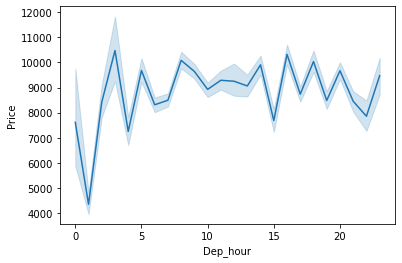

In [139]:
sns.lineplot(x=data['Dep_hour'],y=data['Price'])

- Flights departing at midnight tend to be cheaper

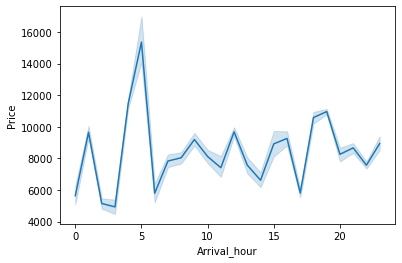

In [140]:
sns.lineplot(x=data['Arrival_hour'],y=data['Price'])

- Flights reaching their destination at early morning tend to be costlier.

<font color='red'>

**Checking the distribution, skewness and outliers in continuous features**

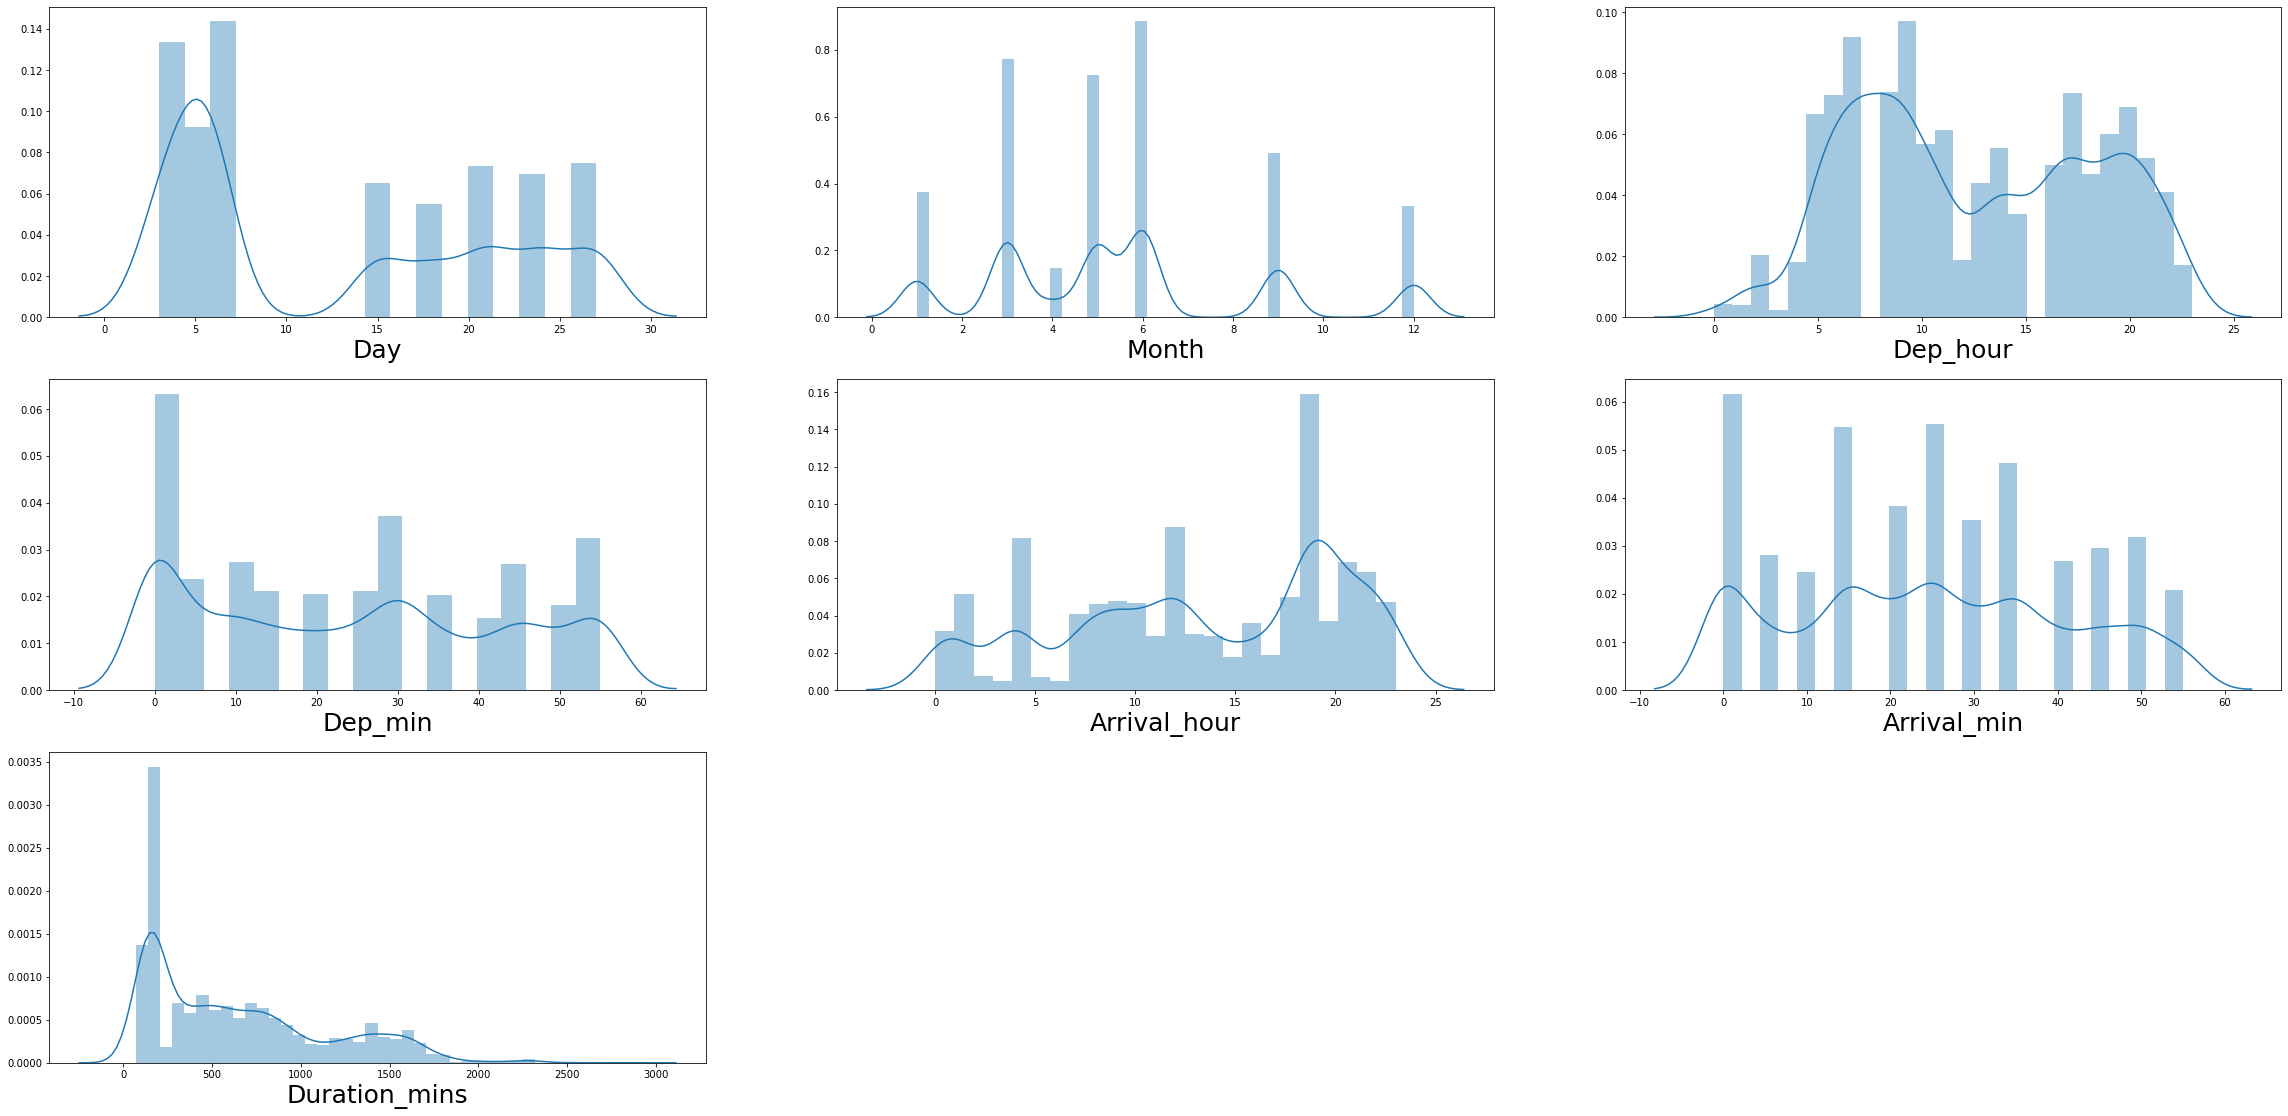

In [141]:
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<10:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [142]:
cont_feat.skew()

Day              0.367373
Month            0.629540
Dep_hour         0.113073
Dep_min          0.167029
Arrival_hour    -0.369988
Arrival_min      0.110945
Duration_mins    0.861074
dtype: float64

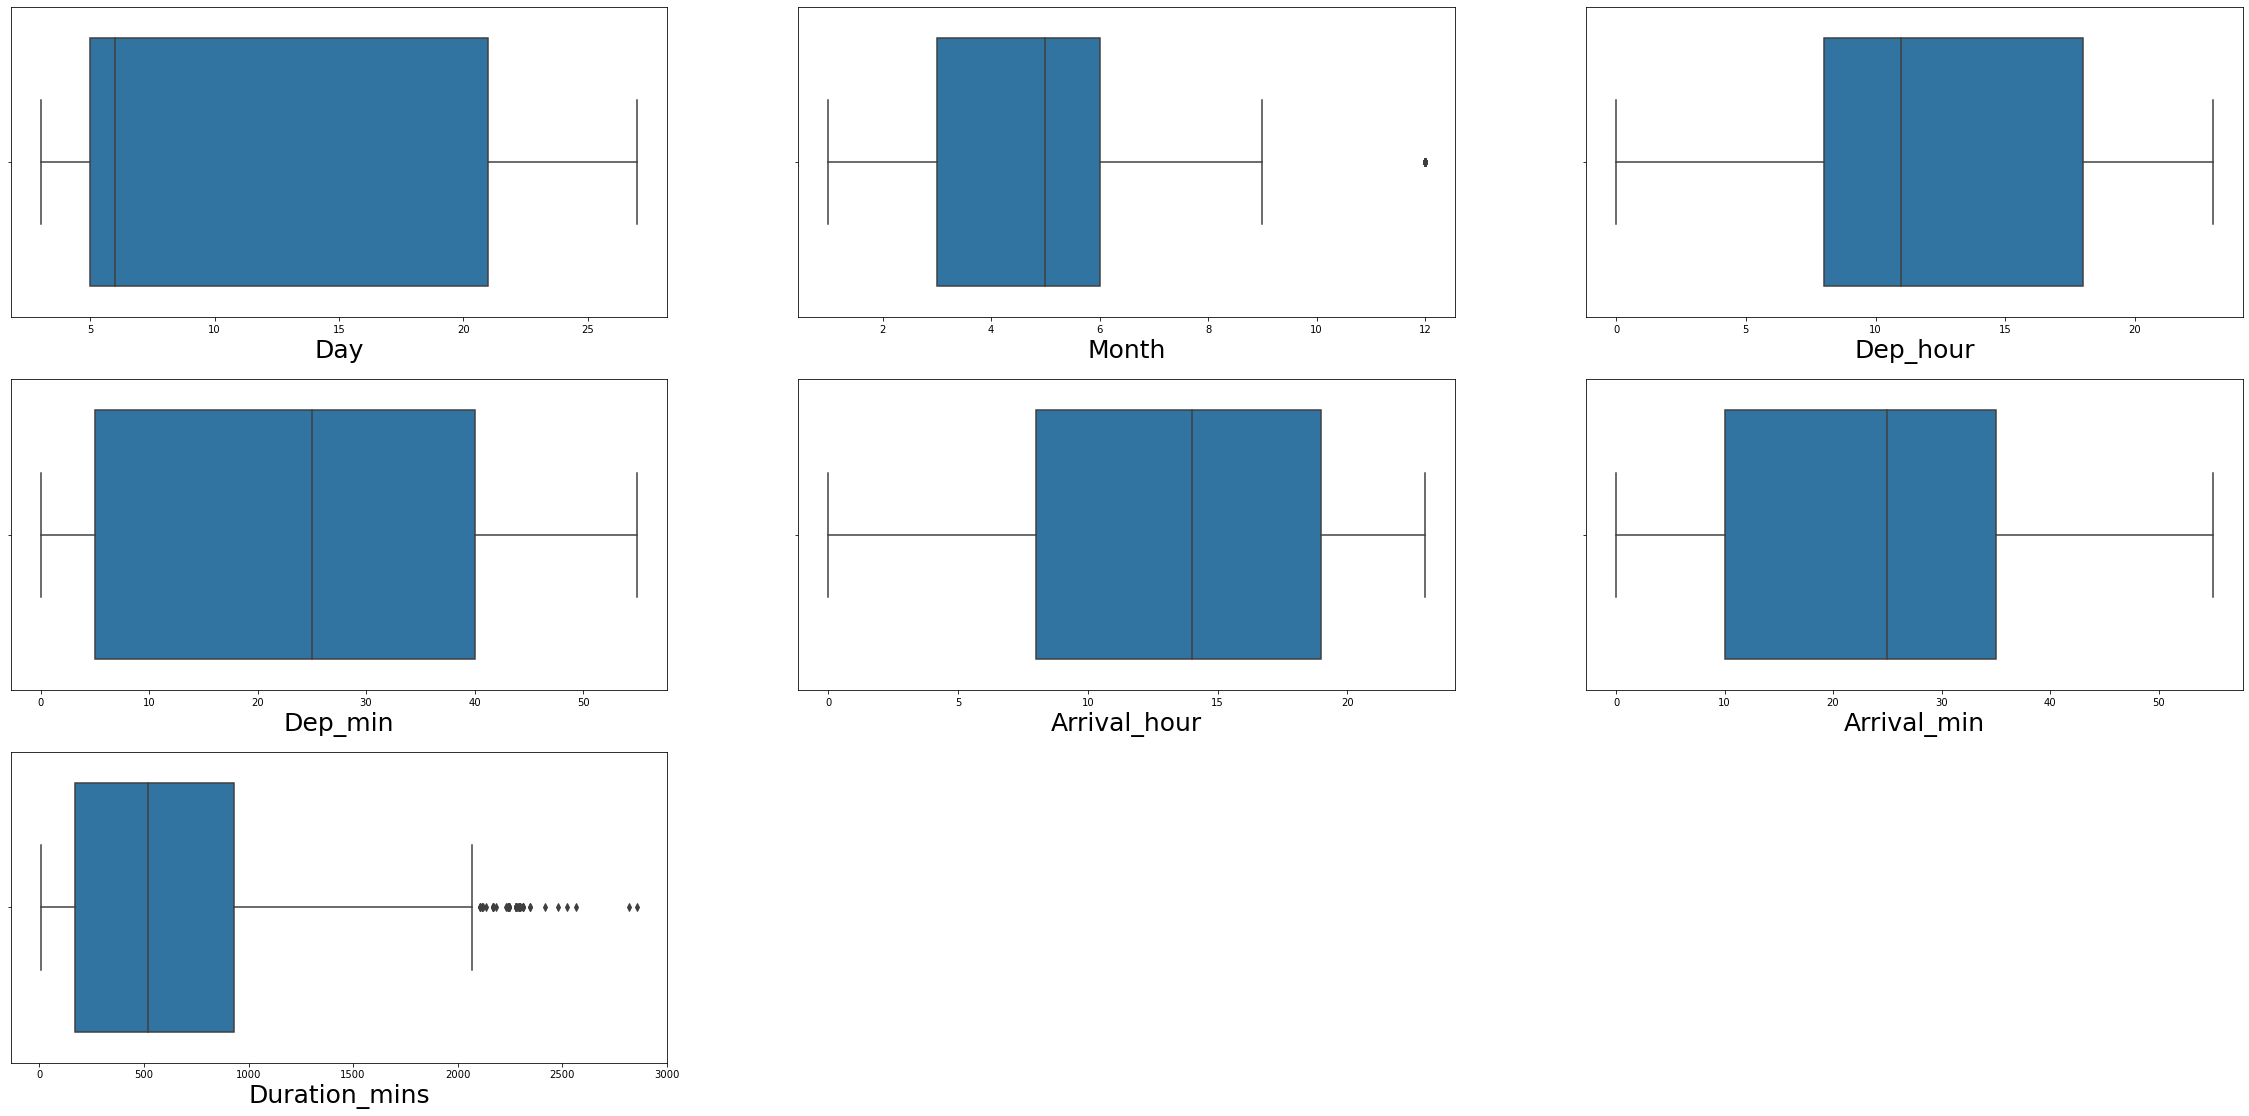

In [143]:
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<10:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

- 'Month' and 'Duration_mins' have outliers but their values are very much realistic and hence we will not drop any outliers from this dataset
- Also 'Month' and 'Duration_mins' show skewness but we will consider 'Month' as a catagorical feature and only treat skewness of 'Duration_mins'

In [144]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(cont_feat)
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(10617, 18)

In [145]:
data['Duration_mins']=np.sqrt(data['Duration_mins'])
data['Duration_mins'].skew()

0.3086912993142219

**Converting object type data into numeric type**

In [146]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include='object').columns)

print(colored('No ofcolumns with object data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include='object').columns))

columns with object data: 
Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Port1', 'Port2',
       'Port3', 'Port4', 'Port5'],
      dtype='object')
No ofcolumns with object data: 
9


In [147]:
data['Additional_Info'].value_counts()

No info                         8286
In-flight meal not included     1975
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [148]:
## Merging 'No Info' and 'No info' to form single class 'No info'
data['Additional_Info'].replace('No Info','No info',inplace=True)
data['Additional_Info'].value_counts()

No info                         8289
In-flight meal not included     1975
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [149]:
## Applying one hot encoding to 'Airline', 'Source', 'Destination'
dummies=pd.get_dummies(data[['Airline', 'Source', 'Destination']])
data=pd.concat([data,dummies],axis=1)

In [150]:
data.drop(['Airline', 'Source', 'Destination'],axis=1,inplace=True)

In [151]:
## Applying Label Encoding to remaining object type data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='O':
        data[i]=le.fit_transform(data[i].values.reshape(-1,1))

In [152]:
data.head()

,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,7,3897,24,3,22,20,1,10,13.038405,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7,7662,5,1,5,50,13,15,21.095023,...,0,0,1,0,1,0,0,0,0,0
2,2.0,7,13882,6,9,9,25,4,25,33.763886,...,0,1,0,0,0,1,0,0,0,0
3,1.0,7,6218,5,12,18,5,23,30,18.027756,...,0,0,1,0,1,0,0,0,0,0
4,1.0,7,13302,3,1,16,50,21,35,16.881943,...,0,0,0,0,0,0,0,0,0,1


**Feature selection using ANOVA f-values**

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [154]:
selectbest=SelectKBest(score_func=f_regression,k=37)
selectbest.fit(data.drop('Price',axis=1),data['Price'])

SelectKBest(k=37, score_func=<function f_regression at 0x000001C850FC6670>)

In [155]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.drop('Price',axis=1).columns)

In [156]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(38,'Scores')

,Features,Scores
0,Total_Stops,6162.319589
11,Port3,5719.418820
8,Duration_mins,4996.072455
18,Airline_Jet Airways,2243.641945
17,Airline_IndiGo,1584.602126
12,Port4,1155.847885
33,Destination_Delhi,1152.828031
22,Airline_SpiceJet,1022.234756
32,Destination_Cochin,832.771635
28,Source_Delhi,832.771635


- will drop:<br>
'Airline_Vistara Premium economy', 'Dep_hour', 'Destination_Banglore', 'Source_Kolkata', 'Airline_Trujet', 'Month', 'Airline_Multiple carriers Premium economy', 'Arrival_hour', 'Dep_min' <br>
due to their low scores

In [157]:
data.drop(['Airline_Vistara Premium economy','Airline_Trujet','Dep_hour','Destination_Banglore','Source_Kolkata',
          'Month','Airline_Multiple carriers Premium economy','Arrival_hour','Dep_min'],axis=1,inplace=True)

**Seperating features and the label**

In [158]:
X=data.drop('Price',axis=1)
y=data['Price']

**Scaling the features**

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [160]:
X_scaled=scaler.fit_transform(X)

**Splitting the dataset into training and testing sets**

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**Importing regression performance metrics**

In [163]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model 1: Random Forest Regressor

In [164]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [165]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [166]:
y_rfr=rfr.predict(X_test)

In [167]:
rfr_score=r2_score(y_test,y_rfr)
rfr_score

0.8247000203853294

In [168]:
rfr_cvs=cross_val_score(rfr,X_train,y_train,cv=7).mean()
rfr_cvs

0.8031182950909521

In [169]:
rfr_rmse=np.sqrt(mean_squared_error(y_test,y_rfr))
rfr_rmse

1917.1924453496406

In [170]:
rfr_rmae=np.sqrt(mean_absolute_error(y_test,y_rfr))
rfr_rmae

30.40959597158074

## Model2: Gradient Boosting Regressor

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [172]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [173]:
y_gbr=gbr.predict(X_test)

In [174]:
gbr_score=r2_score(y_test,y_gbr)
gbr_score

0.8025787625067363

In [175]:
gbr_cvs=cross_val_score(gbr,X_scaled,y,cv=7).mean()
gbr_cvs

0.8033579380827536

In [176]:
gbr_rmse=np.sqrt(mean_squared_error(y_test,y_gbr))
gbr_rmse

2034.5656649646237

In [177]:
gbr_rmae=np.sqrt(mean_absolute_error(y_test,y_gbr))
gbr_rmae

35.60169753441613

## Model 3: KNeighbors Regressor

In [178]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=7)

In [179]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [180]:
y_knr=knr.predict(X_test)

In [181]:
knr_score=r2_score(y_test,y_knr)
knr_score

0.7746887170137925

In [182]:
knr_cvs=cross_val_score(knr,X_scaled,y,cv=5).mean()
knr_cvs

0.7836145423447223

In [183]:
knr_rmse=np.sqrt(mean_squared_error(y_test,y_knr))
knr_rmse

2173.533040879649

In [184]:
knr_rmae=np.sqrt(mean_absolute_error(y_test,y_knr))
knr_rmae

35.11087936635787

## Model 4: Ada Boost Regressor


In [185]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [186]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [187]:
y_abr=abr.predict(X_test)

In [188]:
abr_score=r2_score(y_test,y_abr)
abr_score

0.4377909083564583

In [189]:
abr_cvs=cross_val_score(abr,X_scaled,y,cv=5).mean()
abr_cvs

0.44717122912742696

In [190]:
abr_rmse=np.sqrt(mean_squared_error(y_test,y_abr))
abr_rmse

3433.394510359522

In [191]:
abr_rmae=np.sqrt(mean_absolute_error(y_test,y_abr))
abr_rmae

52.83930728605751

**Saving performance metrics of all models in single dataframe**

In [192]:
metrics=pd.DataFrame()
metrics['Model']=['KNN Regressor','RandomForest Regressor','GradientBoosting Regressor','ADA Boost Regressor']
metrics['R2 Score']=[knr_score,rfr_score,gbr_score,abr_score]
metrics['Cross Val Score']=[knr_cvs,rfr_cvs,gbr_cvs,abr_cvs]
metrics['RMSE']=[knr_rmse,rfr_rmse,gbr_rmse,abr_rmse]
metrics['RMAE']=[knr_rmae,rfr_rmae,gbr_rmae,abr_rmae]

metrics.nlargest(5,'Cross Val Score')

,Model,R2 Score,Cross Val Score,RMSE,RMAE
2,GradientBoosting Regressor,0.802579,0.803358,2034.565665,35.601698
1,RandomForest Regressor,0.824700,0.803118,1917.192445,30.409596
0,KNN Regressor,0.774689,0.783615,2173.533041,35.110879
3,ADA Boost Regressor,0.437791,0.447171,3433.394510,52.839307


**Based on the above metrics comparision, 'Random Forest Regressor' is our best model for this dataset**

<font color='red'>
    
### Tuning the hyperparameter of best model

In [193]:
from sklearn.model_selection import GridSearchCV

In [197]:
rfr_grid={'n_estimators': [80,100],
          'criterion': ['mse', 'mae'],
          'min_samples_split': [2,4],
          'min_samples_leaf': [1,2,],
          'max_leaf_nodes': [4,None]}

In [199]:
gridCV=GridSearchCV(rfr,param_grid=rfr_grid,n_jobs=-1)

In [200]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': [4, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [80, 100]})

In [201]:
gridCV.best_params_

{'criterion': 'mse',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [202]:
rfr_best=RandomForestRegressor(criterion='mse',max_leaf_nodes=None,min_samples_split=4,min_samples_leaf=1)

In [203]:
rfr_best.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=4)

In [204]:
y_best=rfr_best.predict(X_test)

In [205]:
best_score=r2_score(y_test,y_best)
best_score

0.8281345347253579

In [206]:
best_cvs=cross_val_score(rfr_best,X_scaled,y,cv=5).mean()
best_cvs

0.8199883587821402

In [207]:
best_rmse=np.sqrt(mean_squared_error(y_test,y_best))
best_rmse

1898.318522296418

In [208]:
best_rmae=np.sqrt(mean_absolute_error(y_test,y_best))
best_rmae

30.31067204482889

Text(0.5, 1.0, 'Actual vs Predicted')

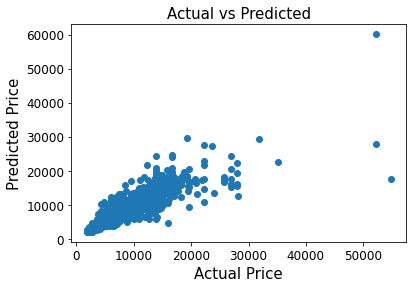

In [209]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



plt.scatter(y_test,y_best)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

## Saving the best model

In [210]:
import pickle
filename='FlightPrice_rfr.pkl'
pickle.dump(rfr_best,open(filename,'wb'))